<a href="https://colab.research.google.com/github/DhruvR-HWUD/DMML-Dubai-UG-Group-2/blob/Razin-Branch/Knn%20Classifier%201%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Accuracy: 0.255
              precision    recall  f1-score   support

           0       0.23      0.05      0.08      1481
           1       0.25      0.46      0.33      1520
           2       0.26      0.45      0.33      1494
           3       0.24      0.06      0.10      1505

    accuracy                           0.25      6000
   macro avg       0.25      0.25      0.21      6000
weighted avg       0.25      0.25      0.21      6000



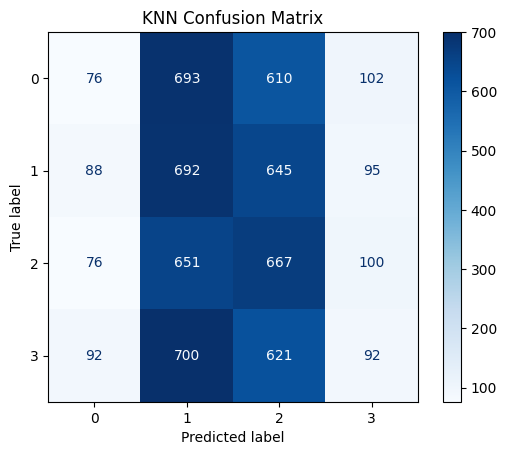

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


url = 'https://raw.githubusercontent.com/DhruvR-HWUD/DMML-Dubai-UG-Group-2/refs/heads/Razin-Branch/Datasets/processed/tabular_data/brain_tumor_dataset.csv'
df = pd.read_csv(url).drop(columns=['Patient_ID'])

X = pd.get_dummies(df.drop(columns=['Histology']), drop_first=True)
y = LabelEncoder().fit_transform(df['Histology'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit(X_train).transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()
